<a href="https://colab.research.google.com/github/norayehia/Brain-Tumor-MRI-detection-cv/blob/main/resnetandcnnandensam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2

import numpy as np
import pandas as pd
from glob import glob

import PIL.Image as Image
import matplotlib.pylab as plt

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

#from keras.preprocessing import image
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/domiatresearch/brain.zip' -d brain

Streaming output truncated to the last 5000 lines.
 extracting: brain/Data /064/DWI/B1000/DICOM/Display (10)_(Wednesday-20-2022_03-22-42-7022).dcm  
 extracting: brain/Data /064/DWI/B1000/DICOM/Display (11)_(Wednesday-20-2022_03-22-42-7133).dcm  
 extracting: brain/Data /064/DWI/B1000/DICOM/Display (12)_(Wednesday-20-2022_03-22-42-7242).dcm  
 extracting: brain/Data /064/DWI/B1000/DICOM/Display (3)_(Wednesday-20-2022_03-22-42-6093).dcm  
 extracting: brain/Data /064/DWI/B1000/DICOM/Display (4)_(Wednesday-20-2022_03-22-42-6213).dcm  
 extracting: brain/Data /064/DWI/B1000/DICOM/Display (5)_(Wednesday-20-2022_03-22-42-6433).dcm  
 extracting: brain/Data /064/DWI/B1000/DICOM/Display (6)_(Wednesday-20-2022_03-22-42-6563).dcm  
 extracting: brain/Data /064/DWI/B1000/DICOM/Display (7)_(Wednesday-20-2022_03-22-42-6673).dcm  
 extracting: brain/Data /064/DWI/B1000/DICOM/Display (8)_(Wednesday-20-2022_03-22-42-6783).dcm  
 extracting: brain/Data /064/DWI/B1000/DICOM/Display (9)_(Wednesday-20-20

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/domiatresearch/AI cases.xlsx')

cat_arr = np.array(pd.Categorical(df['Grade']).categories)

print(cat_arr)

['benign' 'high' 'intermediate' 'low' 'low to high' 'low to intermediate']


In [ ]:
dirs = glob('/content/brain/Data /*')

print(len(dirs))

90


In [ ]:
df

,No,Real Histopatholagy,Stopathology By,Grade
0,1.0,xanthoastrocytoma,HIGH GRADE,intermediate
1,2.0,diffuse high grade,HIGH GRADE,high
2,3.0,naplastic astrocytoma grade,high grade,high
3,4.0,high grade,high grade,high
4,7.0,grade IV,high grade,high
...,...,...,...,...
93,98.0,high grade,high grade,high
94,99.0,NaN,low grade,low
95,100.0,NaN,intermediate,intermediate
96,101.0,NaN,high grade,high


In [ ]:
labels_dict = {
    'high': 0,
    'low': 1,
    'intermediate': 2,
    'low to intermediate': 3,
    'low to high': 4,
    'benign': 5,
}

In [ ]:
X, y = [], []

for dir in dirs:
    try:
      images = glob(dir+'/FLAIR/BMP/*')
      row_no = int(dir[-2:])
      row = df.loc[df['No'] == row_no]
      rr = row.iloc[0]
      for image in images:
          img = cv2.imread(str(image))
          resized_img = cv2.resize(img,(224,224))
          X.append(resized_img)
          y.append(labels_dict[rr['Grade']])
    except IndexError:
      y.append(0)

In [ ]:
X = np.array(X)
y = np.array(y)

58 :  0


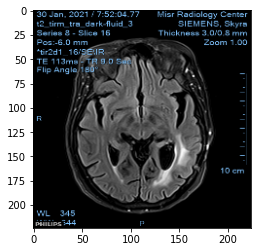

In [ ]:
import random
image_num = random.randint(1,90)
print(image_num, ': ', y[image_num])
plt.imshow(X[image_num])

In [ ]:
print(len(X))
print(len(y))

y = y[:-4]

print(len(X))
print(len(y))

1210
1214
1210
1210


In [ ]:
(X_train, X_valid, y_train, y_valid) = train_test_split(X, y, test_size=0.20, random_state=42)

X_train_scaled = np.array(X_train, dtype="float") / 255.0
X_valid_scaled = np.array(X_valid, dtype="float") / 255.0

In [ ]:
from sklearn.utils import shuffle
# # image data generator
# train_datagen=ImageDataGenerator(rotation_range=20,
#                                  width_shift_range=0.2,
#                                  height_shift_range=0.2,
#                                  shear_range=0.2,
#                                  zoom_range=0.2,
#                                  horizontal_flip=True,
#                                  fill_mode='nearest',
#                                  preprocessing_function=preprocess_input)

train_datagen=ImageDataGenerator()

valid_datagen=ImageDataGenerator()

In [ ]:
batch_size = 50
train_generator = train_datagen.flow(X_train_scaled, y_train, batch_size=batch_size)
valid_generator = valid_datagen.flow(X_valid_scaled, y_valid, batch_size=batch_size)

In [ ]:
base_model.trainable = False

In [ ]:
step_size_train = train_generator.n//train_generator.batch_size
step_size_valid = valid_generator.n//valid_generator.batch_size

# Model

.............................................................

#Resnet

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np




In [ ]:

IMAGE_SIZE = [224, 224]
base_modell = ResNet50(input_shape=(224,224,3), weights='imagenet', include_top=False)

from keras import Model

flatten = Flatten()(base_model.output)

predication = Dense(len(labels_dict.keys()), activation='softmax')(flatten)
model_tll = Model(inputs=base_model.input, outputs=predication)

model_tll.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
import tensorflow as tf

model_tll.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                 optimizer=opt, 
                 metrics=['accuracy'])

In [ ]:
model_tll.summary()


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
historyy=model_tll.fit(train_generator,
             steps_per_epoch=step_size_train,
             epochs=20,
             validation_data=valid_generator,
             validation_steps=step_size_valid)

Epoch 1/20
19/19 [==============================] - 6s 302ms/step - loss: 0.1561 - accuracy: 0.9619 - val_loss: 0.6149 - val_accuracy: 0.8300
Epoch 2/20
19/19 [==============================] - 6s 301ms/step - loss: 0.1732 - accuracy: 0.9630 - val_loss: 0.5403 - val_accuracy: 0.8500
Epoch 3/20
19/19 [==============================] - 6s 302ms/step - loss: 0.1727 - accuracy: 0.9608 - val_loss: 0.6103 - val_accuracy: 0.8250
Epoch 4/20
19/19 [==============================] - 6s 304ms/step - loss: 0.1833 - accuracy: 0.9662 - val_loss: 0.6531 - val_accuracy: 0.8450
Epoch 5/20
19/19 [==============================] - 6s 305ms/step - loss: 0.1781 - accuracy: 0.9597 - val_loss: 0.6524 - val_accuracy: 0.8500
Epoch 6/20
19/19 [==============================] - 6s 315ms/step - loss: 0.1392 - accuracy: 0.9684 - val_loss: 0.5940 - val_accuracy: 0.8450
Epoch 7/20
19/19 [==============================] - 6s 308ms/step - loss: 0.1576 - accuracy: 0.9510 - val_loss: 0.7235 - val_accuracy: 0.8250
Epoch 

#when make trainable by false give us higher accuracy

In [ ]:
base_modell.trainable = False

In [ ]:
historyy=model_tll.fit(train_generator,
             steps_per_epoch=step_size_train,
             epochs=20,
             validation_data=valid_generator,
             validation_steps=step_size_valid)

Epoch 1/20
19/19 [==============================] - 6s 315ms/step - loss: 0.0628 - accuracy: 0.9837 - val_loss: 0.7450 - val_accuracy: 0.8100
Epoch 2/20
19/19 [==============================] - 6s 314ms/step - loss: 0.0652 - accuracy: 0.9826 - val_loss: 0.7411 - val_accuracy: 0.8500
Epoch 3/20
19/19 [==============================] - 6s 315ms/step - loss: 0.0731 - accuracy: 0.9815 - val_loss: 0.7516 - val_accuracy: 0.8300
Epoch 4/20
19/19 [==============================] - 6s 316ms/step - loss: 0.0759 - accuracy: 0.9815 - val_loss: 0.7362 - val_accuracy: 0.8300
Epoch 5/20
19/19 [==============================] - 6s 314ms/step - loss: 0.0626 - accuracy: 0.9837 - val_loss: 0.6867 - val_accuracy: 0.8550
Epoch 6/20
19/19 [==============================] - 6s 316ms/step - loss: 0.0588 - accuracy: 0.9804 - val_loss: 0.6844 - val_accuracy: 0.8300
Epoch 7/20
19/19 [==============================] - 6s 315ms/step - loss: 0.0597 - accuracy: 0.9793 - val_loss: 0.6229 - val_accuracy: 0.8550
Epoch 

In [ ]:
%matplotlib inline

def plot_training_history(history):
  plt.style.use('ggplot')
  fig = plt.figure(figsize=(16,6))
  
  plt.subplot(1,2,1)
  plt.plot(historyy.history['val_accuracy'], label='val accuracy')
  plt.plot(historyy.history['accuracy'], label='train accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.title('Training and Validation Accuracy')
  plt.legend(['Validation Accuracy','Training Accuracy'], loc='lower right')
  
  plt.subplot(1,2,2)
  plt.plot(historyy.history['val_loss'], label='val loss')
  plt.plot(historyy.history['loss'], label='train loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.title('Training and Validation Loss')
  plt.legend(['Validation Loss','Training Loss'], loc='upper right')
  plt.show()

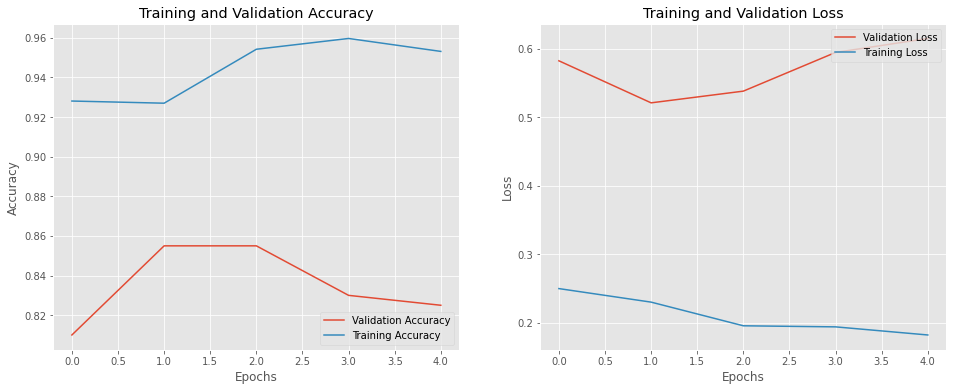

In [ ]:
plot_training_history(historyy)

In [ ]:
Y_predd=model_tll.predict(valid_generator, np.ceil(len(valid_generator)))

5/5 [==============================] - 1s 262ms/step


In [ ]:

valid_generator = valid_datagen.flow(X_valid_scaled, y_valid, batch_size=batch_size)

In [ ]:
# import seaborn as sns
# import numpy
# import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

list_label = list(labels_dict.keys())

y_prede = np.argmax(Y_predd, axis=1)

x_gen,y_gen = valid_generator.next()
y_prede
#y_gen = np.argmax(y_gen, axis=1)
y_gen

array([0, 0, 4, 0, 0, 0, 0, 1, 0, 0, 0, 4, 1, 1, 0, 0, 0, 1, 1, 0, 0, 4,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0])

In [ ]:
y_valid.shape

(242,)

In [ ]:
y_prede.shape

(242,)

In [ ]:

print('Classification Report')
print(classification_report(y_valid, y_prede, target_names=list_label))

Classification Report
                     precision    recall  f1-score   support

               high       0.69      0.63      0.66       159
                low       0.30      0.39      0.34        59
       intermediate       0.06      0.07      0.06        15
low to intermediate       0.00      0.00      0.00         2
        low to high       0.00      0.00      0.00         4
             benign       0.00      0.00      0.00         3

           accuracy                           0.51       242
          macro avg       0.18      0.18      0.18       242
       weighted avg       0.53      0.51      0.52       242



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
c_matrix=confusion_matrix(y_valid, y_prede)

print(c_matrix)

[[100  49   8   0   1   1]
 [ 29  23   6   0   0   1]
 [ 11   2   1   0   0   1]
 [  1   1   0   0   0   0]
 [  3   0   1   0   0   0]
 [  1   1   1   0   0   0]]


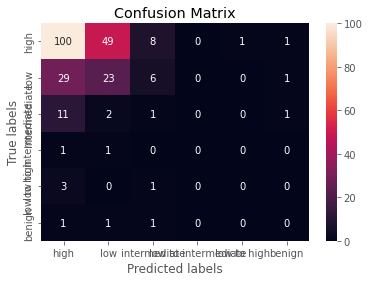

In [ ]:
import seaborn as sns
ax = plt.subplot()
sns.heatmap(c_matrix, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(list_label); ax.yaxis.set_ticklabels(list_label);

#cnn

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image  import  ImageDataGenerator
from tensorflow.keras.preprocessing import image
import keras

In [ ]:
modell=tf.keras.models.Sequential(
[#16 filter ,inputshapesize200*200 RGB *3
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(224, 224,3)),
    tf.keras.layers.MaxPool2D(2,2),
    #32 filter
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    #
     tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    #flatten
    tf.keras.layers.Flatten(),
    #activation and outputlayes
    tf.keras.layers.Dense(512,activation='relu'),
    #2clases need on nerron 
    tf.keras.layers.Dense(len(labels_dict.keys()),activation='softmax')
    
]
)

In [ ]:
modell.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                 optimizer=opt, 
                 metrics=['accuracy'])

In [ ]:
histor=modell.fit(train_generator,
             steps_per_epoch=step_size_train,
             epochs=20,
             validation_data=valid_generator,
             validation_steps=step_size_valid)

Epoch 1/20
19/19 [==============================] - 2s 112ms/step - loss: 0.4699 - accuracy: 0.8257 - val_loss: 0.6466 - val_accuracy: 0.7800
Epoch 2/20
19/19 [==============================] - 2s 109ms/step - loss: 0.3411 - accuracy: 0.8824 - val_loss: 0.6592 - val_accuracy: 0.8300
Epoch 3/20
19/19 [==============================] - 2s 108ms/step - loss: 0.2714 - accuracy: 0.9041 - val_loss: 0.6329 - val_accuracy: 0.8250
Epoch 4/20
19/19 [==============================] - 2s 109ms/step - loss: 0.2388 - accuracy: 0.9074 - val_loss: 0.8494 - val_accuracy: 0.8000
Epoch 5/20
19/19 [==============================] - 2s 109ms/step - loss: 0.1837 - accuracy: 0.9314 - val_loss: 0.7146 - val_accuracy: 0.8250
Epoch 6/20
19/19 [==============================] - 2s 110ms/step - loss: 0.1656 - accuracy: 0.9379 - val_loss: 0.9124 - val_accuracy: 0.7950
Epoch 7/20
19/19 [==============================] - 2s 113ms/step - loss: 0.1822 - accuracy: 0.9314 - val_loss: 0.9278 - val_accuracy: 0.8150
Epoch 

In [ ]:
Y_predd2=modell.predict(valid_generator, np.ceil(len(valid_generator)))

5/5 [==============================] - 1s 149ms/step


In [ ]:
# import seaborn as sns
# import numpy
# import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

list_label = list(labels_dict.keys())

y_prede2 = np.argmax(Y_predd2, axis=1)



In [ ]:
print('Classification Report')
print(classification_report(y_valid, y_prede2, target_names=list_label))

Classification Report
                     precision    recall  f1-score   support

               high       0.64      0.68      0.66       159
                low       0.17      0.15      0.16        59
       intermediate       0.08      0.07      0.07        15
low to intermediate       0.00      0.00      0.00         2
        low to high       0.00      0.00      0.00         4
             benign       0.00      0.00      0.00         3

           accuracy                           0.49       242
          macro avg       0.15      0.15      0.15       242
       weighted avg       0.47      0.49      0.48       242



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
c_matrix=confusion_matrix(y_valid, y_prede2)

print(c_matrix)

[[108  41   6   0   0   4]
 [ 42   9   4   0   1   3]
 [ 11   3   1   0   0   0]
 [  2   0   0   0   0   0]
 [  3   0   1   0   0   0]
 [  3   0   0   0   0   0]]


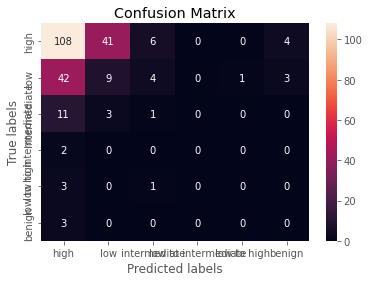

In [ ]:
import seaborn as sns
ax = plt.subplot()
sns.heatmap(c_matrix, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(list_label); ax.yaxis.set_ticklabels(list_label);

.............................................................

Ensamble 

In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from keras.layers import GlobalAveragePooling2D, Flatten, BatchNormalization, Dense, Dropout
from tensorflow.keras.layers import MaxPooling2D, GlobalAveragePooling2D
base_model1 = InceptionV3(
                    input_shape=(224, 224, 3),
                    weights='imagenet',
                    include_top=False)
# Freeze the first 10 layers
for layer in base_model1.layers[:10]:
    layer.trainable = False
x = base_model1.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.4)(x)
predictions1 = Dense(len(labels_dict.keys()), activation='softmax')(x)
model1 = Model(inputs=base_model1.inputs, outputs=predictions1)

87910968/87910968 [==============================] - 1s 0us/step


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import MaxPooling2D, GlobalAveragePooling2D
base_model2 = VGG16(
                    input_shape=(224, 224, 3),
                    weights='imagenet',
                    include_top=False)
# Freeze the first 10 layers
for layer in base_model2.layers[:10]:
    layer.trainable = False
x = base_model2.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
predictions2 = Dense(len(labels_dict.keys()), activation='softmax')(x)
model2 = Model(inputs=base_model2.inputs, outputs=predictions2)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
model1.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

model2.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
history1=model1.fit(train_generator,
             steps_per_epoch=step_size_train,
             epochs=20,
             validation_data=valid_generator,
             validation_steps=step_size_valid)

In [ ]:
model1.save('/content/drive/MyDrive/domiatresearch/mo/model1.h5')

import matplotlib.pyplot as plt
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
history2=model2.fit(train_generator,
             steps_per_epoch=step_size_train,
             epochs=20,
             validation_data=valid_generator,
             validation_steps=step_size_valid)

In [ ]:
model2.save('/content/drive/MyDrive/domiatresearch/mo/model2.h5')

import matplotlib.pyplot as plt
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

ensamble of 1 and 2 model

In [ ]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Average
model_1 = load_model('/content/drive/MyDrive/domiatresearch/mo/model1.h5')
model_1 = Model(inputs=model_1.inputs,
                outputs=model_1.outputs,
                name='name_of_model_1')
model_2 = load_model('/content/drive/MyDrive/domiatresearch/mo/model2.h5')
model_2 = Model(inputs=model_2.inputs,
                outputs=model_2.outputs,
                name='name_of_model_2')
models = [model_1, model_2]
model_input = Input(shape=(224, 224, 3))
model_outputs = [model(model_input) for model in models]
ensemble_output = Average()(model_outputs)
ensemble_model = Model(inputs=model_input, outputs=ensemble_output, name='ensemble')

ensemble_model.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [ ]:
history=ensemble_model.fit(train_generator,
             steps_per_epoch=step_size_train,
             epochs=3,
             validation_data=valid_generator,
             validation_steps=step_size_valid)

Epoch 1/3
19/19 [==============================] - 19s 1s/step - loss: 1.0015 - accuracy: 0.6484 - val_loss: 1.3018 - val_accuracy: 0.4450
Epoch 2/3
19/19 [==============================] - 20s 1s/step - loss: 0.9285 - accuracy: 0.6928 - val_loss: 1.0792 - val_accuracy: 0.5750
Epoch 3/3
19/19 [==============================] - 13s 707ms/step - loss: 0.8621 - accuracy: 0.7407 - val_loss: 1.0091 - val_accuracy: 0.6650


In [ ]:
predictions =ensemble_model.predict(valid_generator)

5/5 [==============================] - 2s 362ms/step


In [ ]:
predictions2=ensemble_model.predict(valid_generator, np.ceil(len(valid_generator)))

5/5 [==============================] - 2s 363ms/step


In [ ]:
# import seaborn as sns
# import numpy
# import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

list_label = list(labels_dict.keys())

predictions22 = np.argmax(predictions2, axis=1)

In [ ]:
print('Classification Report')
print(classification_report(y_valid, predictions22, target_names=list_label))

Classification Report
                     precision    recall  f1-score   support

               high       0.64      1.00      0.78       155
                low       0.00      0.00      0.00        55
       intermediate       0.00      0.00      0.00        23
low to intermediate       0.00      0.00      0.00         2
        low to high       0.00      0.00      0.00         4
             benign       0.00      0.00      0.00         3

           accuracy                           0.64       242
          macro avg       0.11      0.17      0.13       242
       weighted avg       0.41      0.64      0.50       242



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
c_matrix=confusion_matrix(y_valid, predictions22)

print(c_matrix)

[[155   0   0   0   0   0]
 [ 55   0   0   0   0   0]
 [ 23   0   0   0   0   0]
 [  2   0   0   0   0   0]
 [  4   0   0   0   0   0]
 [  3   0   0   0   0   0]]


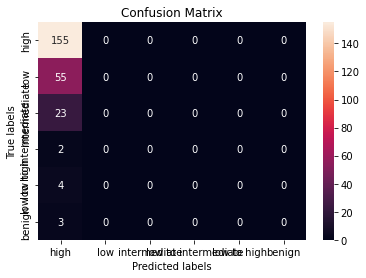

In [ ]:
import seaborn as sns
ax = plt.subplot()
sns.heatmap(c_matrix, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(list_label); ax.yaxis.set_ticklabels(list_label);

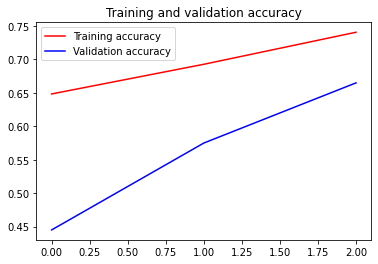

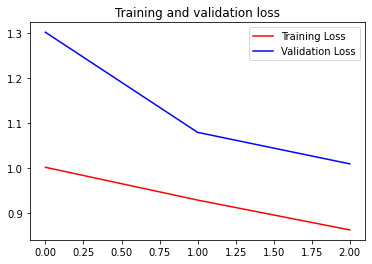

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()